In [1]:
import sys
sys.path.append('../')
from utils import *

In [8]:
img_list = ['../result/GPT_上下文学习_1prompt_4层_warmup_cos_lr_2e-5/compare_context.png', 
            '../result/GPT_context_for_paper/loss_and_acc_of_datasize.png']
display_fig(img_list, width=[470, 176])

In [2]:
def plot_context_compare(exp_dir, datasize_list):
    r'''
        使用柱状图展示上下文任务准确率随着训练数据量的变化
        每个训练数据量画4个柱子，分别是context正向和逆向在epoch=400和4000时的准确率
    '''
    # 加载数据
    forward_400 = []
    reverse_400 = []
    forward_4000 = []
    reverse_4000 = []
    for i, datasize in enumerate(datasize_list):
        acc_epoch_his = np.load(f'{exp_dir}/context-seed_1-N_{datasize}/loss/acc_epoch_his.npy').tolist()
        test_acc_his = np.load(f'{exp_dir}/context-seed_1-N_{datasize}/loss/test_acc_his.npy')

        forward_acc_list = test_acc_his[:, 0]
        reverse_acc_list = test_acc_his[:, 1]

        forward_400.append(forward_acc_list[acc_epoch_his.index(400)])
        reverse_400.append(reverse_acc_list[acc_epoch_his.index(400)])
        forward_4000.append(forward_acc_list[-1])
        reverse_4000.append(reverse_acc_list[-1])

    datas = [forward_400, reverse_400, forward_4000, reverse_4000]

    fig = plt.figure(figsize=(16, 8))
    format_settings(left=0.18, right=0.92, bottom=0.15, top=0.82, major_tick_len=0, fs=32)
    plt.rcParams['xtick.major.pad'] = 10
    plt.rcParams['ytick.major.pad'] = 5

    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False

    ax = plt.gca()

    labels = ['forward, epoch=400', 'reverse, epoch=400', 'forward, epoch=4000', 'reverse, epoch=4000']
    color_list = ['lightsalmon', 'skyblue', 'tomato', 'steelblue']
    width = 0.15
    for i, data in enumerate(datas):
        ax.bar(np.arange(len(datasize_list))-1.5*width+i*width, data, width=width, 
               label=labels[i], color=color_list[i], 
               edgecolor='black', linewidth=2)
    
    ax.set_xticks(np.arange(len(datasize_list)))
    ax.set_xticklabels(datasize_list)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])

    ax.set_xlabel('Data Size', labelpad=10)
    ax.set_ylabel('Test Accuracy')

    ax.legend(loc=(-0.12, 1.02), frameon=False, ncol=2)

    plt.savefig(f'{exp_dir}/compare_context.png', dpi=300)
    print(f'saved at {exp_dir}/compare_context.png')

saved at ../result/GPT_上下文学习_1prompt_4层_warmup_cos_lr_2e-5/compare_context.png


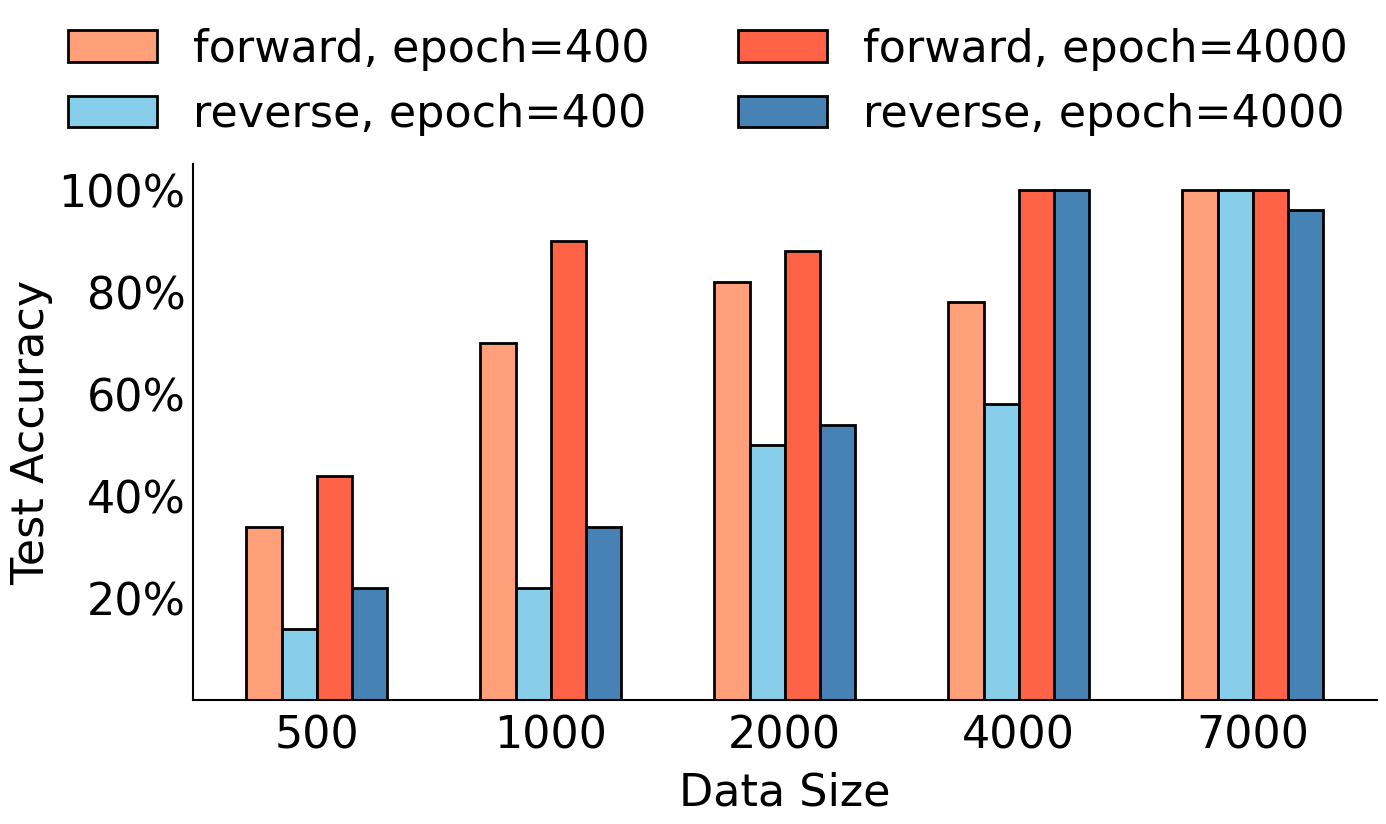

In [3]:
exp_dir = '../result/GPT_上下文学习_1prompt_4层_warmup_cos_lr_2e-5'
datasize_list = [500, 1000, 2000, 4000, 7000]

plot_context_compare(exp_dir, datasize_list)

In [4]:
def plot_loss_and_acc_with_datasize_together(exp_dir, datasize_list, seed=1, target='context'):
    
    raw_num = len(datasize_list)

    color_list = ['m', 'teal', 'magenta', 'c']

    fig = plt.figure(figsize=(6, 8))
    format_settings(wspace=0.8, hspace=0.6, bottom=0.1, left=0.25, right=0.78, top=0.95, lw=1, ms=3, fs=24)
    
    grid = plt.GridSpec(raw_num, 1)

    for j, N in enumerate(datasize_list):
        working_dir = f'{exp_dir}/{target}-seed_{seed}-N_{N}'

        train_loss_his = np.load(f'{working_dir}/loss/train_loss_his.npy')
        test_loss_his = np.load(f'{working_dir}/loss/test_loss_his.npy')

        acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')
        train_acc_his = np.load(f'{working_dir}/loss/train_acc_his.npy')
        test_acc_his = np.load(f'{working_dir}/loss/test_acc_his.npy')

        plot_mask = 0
        if os.path.exists(f'{working_dir}/loss/acc_train_mask_his.npy'):
            acc_train_mask_his = np.load(f'{working_dir}/loss/acc_train_mask_his.npy')
            acc_test_mask_his = np.load(f'{working_dir}/loss/acc_test_mask_his.npy')
            plot_mask = 1
        acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
        acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')

        
        ax = fig.add_subplot(grid[j, 0])
        
        l1, = ax.semilogy(train_loss_his, label='train loss', color='#C82423', linestyle='-', lw=3)
        # l2, = ax.semilogy(test_loss_his, label='test loss', color='#2878B5', linestyle='-')

        # 新开一个轴画acc
        ax2 = ax.twinx()
        color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
        # l3, = ax2.plot(acc_epoch_his[::2], acc_train_unmask_his[::2], label=f'train acc', lw=2, color=color_list[0], 
        #         marker = 's', markersize=5, markeredgewidth=1, markeredgecolor='black', zorder=5)
        # l4, = ax2.plot(acc_epoch_his, acc_test_unmask_his, label=f'test acc', lw=2, color=color_list[1], 
        #         marker = 'o', markersize=5, markeredgewidth=1, markeredgecolor='black', zorder=6)
        
        l3, = ax2.plot(acc_epoch_his[::3], test_acc_his[::3, 0], label=f'forward acc', lw=3, color=color_list[0],
                       marker = 's', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[0], zorder=5)
        l4, = ax2.plot(acc_epoch_his[::3], test_acc_his[::3, 1], label=f'reverse acc', lw=3, color=color_list[1],
                          marker = 'D', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[1], zorder=6)
        
        # 画legend
        l1, = ax.semilogy([], label='train loss', color='#C82423', linestyle='-', lw=3)
        l3, = ax2.plot([], [], label=f'forward acc', lw=3, color=color_list[0],
                       marker = 's', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[0], zorder=5)
        l4, = ax2.plot([], [], label=f'reverse acc', lw=3, color=color_list[1],
                          marker = 'D', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[1], zorder=6)

        # legend
        if j == 1:
            handler_map = {}
            handler_map[l1] = HandlerLine2D()
            # handler_map[l2] = HandlerLine2D()
            handler_map[l3] = HandlerLine2D(numpoints=2)
            handler_map[l4] = HandlerLine2D(numpoints=2)
            # handles = [l1, l2, l3, l4]
            handles = [l1, l3, l4]

            # ax.legend(loc=(0, 1.1), handles=handles, frameon=False, handler_map=handler_map, ncol=len(handles))
            # ax.legend(loc=(-0.28, -0.6), handles=handles, frameon=False, handler_map=handler_map, ncol=len(handles))
            ax.legend(loc=(0.3, 0.2), handles=handles, frameon=False, handler_map=handler_map, fontsize=16)

        ax.set_yticks([1e0, 1e-3, 1e-6])
        ax.set_yticklabels(['1E+0', '1E-3', '1E-6'])

        ax2.set_yticks([0.2, 0.6, 1.0])
        ax2.set_yticklabels(['20%', '60%', '100%'])

        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax2.set_ylabel('Accuracy', rotation=270, labelpad=10)

        ax2.set_ylim(-0.05, 1.1)


        # title
        ax.set_title(f'data size = {N}')

    plt.savefig(f'{exp_dir}/loss_and_acc_of_datasize.png', dpi=300)
    print(f'saved at {exp_dir}/loss_and_acc_of_datasize.png')

saved at ../result/GPT_context_for_paper/loss_and_acc_of_datasize.png


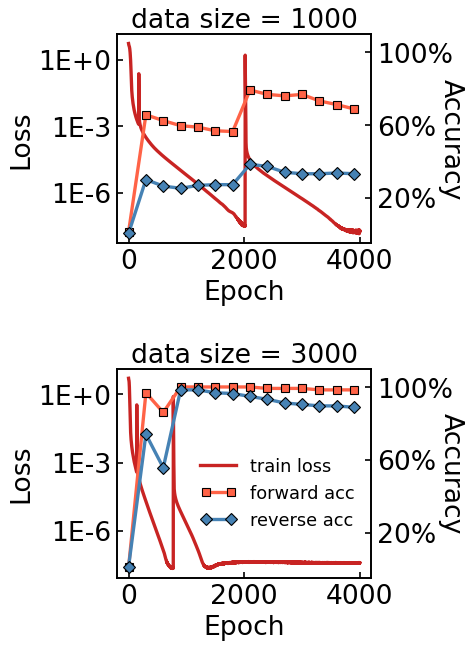

In [6]:
exp_dir = f'../result/GPT_context_for_paper'
datasize_list = [1000, 3000]
plot_loss_and_acc_with_datasize_together(exp_dir, datasize_list)